In [68]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv('twitter_validation.csv',header=None,encoding='ISO-8859-1') #encoding is used since data may contain emojis and different languages
df.columns=['id','topic','target','text']
df

,id,topic,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [70]:
df.head()

,id,topic,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [71]:
df.tail()

,id,topic,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [72]:

df.dtypes

id         int64
topic     object
target    object
text      object
dtype: object

In [73]:
df.shape

(1000, 4)

In [74]:
df.isna().sum()

id        0
topic     0
target    0
text      0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   topic   1000 non-null   object
 2   target  1000 non-null   object
 3   text    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [76]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

Text(0.5, 1.0, 'Target value count ')

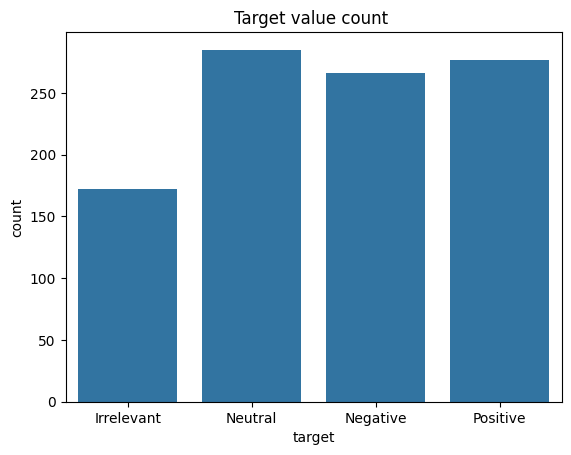

In [77]:
sns.countplot(x=df['target'])
plt.title('Target value count ')

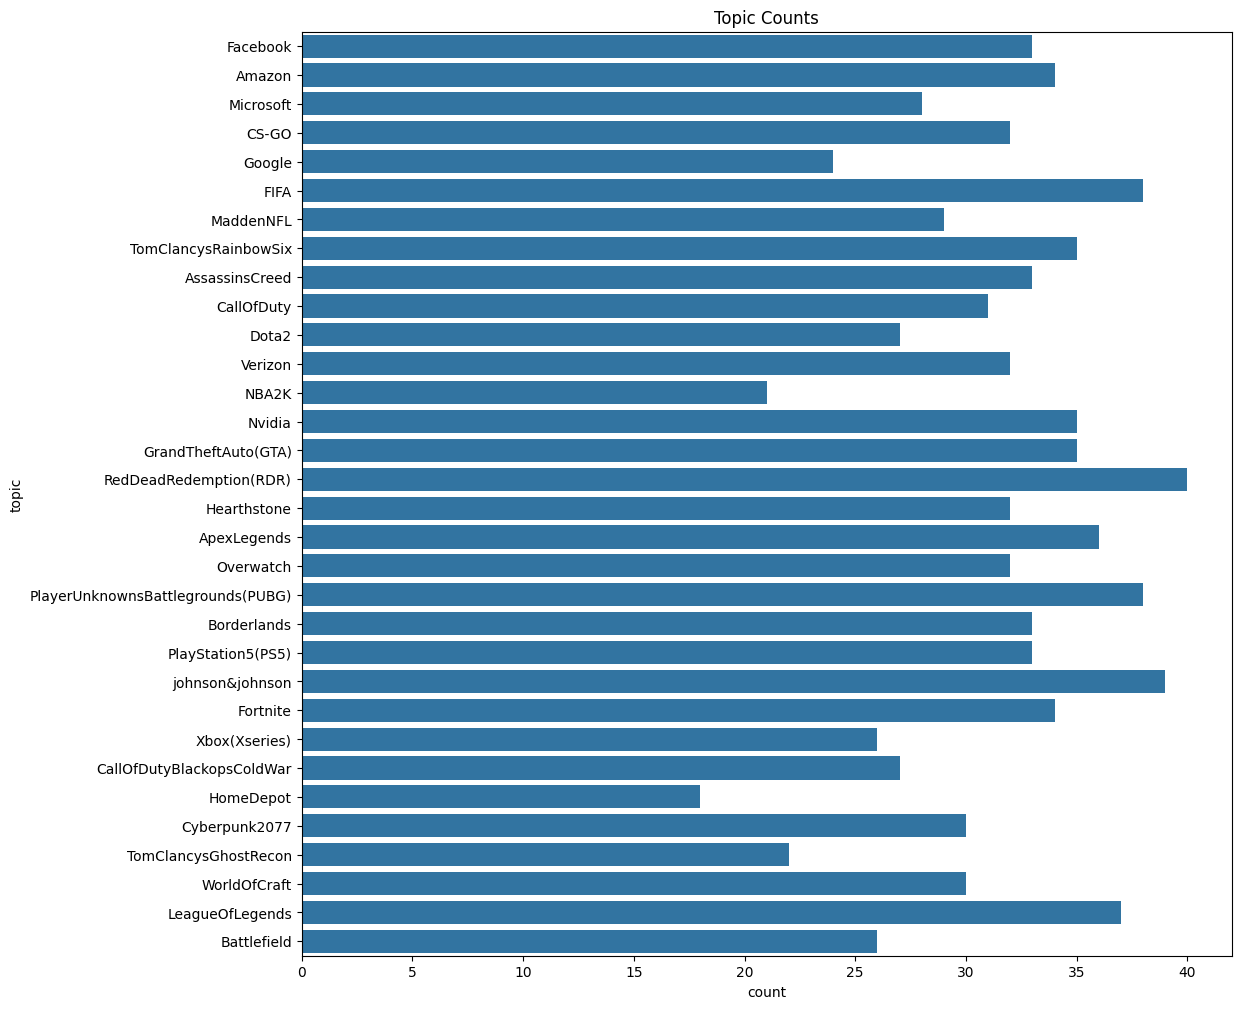

In [78]:
plt.figure(figsize=(12,12))
sns.countplot(df['topic'])
plt.title('Topic Counts')
plt.show()

In [79]:
# Removing irrelevant comments

df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df


,id,topic,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [80]:
# reseting index values after dropping irrelavent rows

df.reset_index(drop=True,inplace=True)
df

,id,topic,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [81]:
df.drop(columns=['id','topic'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [82]:
df['target']=df['target'].map({'Positive':1,'Negetive':-1,'Neutral':0})
df

,target,text
0,0.0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,NaN,@Microsoft Why do I pay for WORD when it funct...
2,NaN,"CSGO matchmaking is so full of closet hacking,..."
3,0.0,Now the President is slapping Americans in the...
4,NaN,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,NaN,Please explain how this is possible! How can t...
824,1.0,Good on Sony. As much as I want to see the new...
825,1.0,Today sucked so itâs time to drink wine n pl...
826,1.0,Bought a fraction of Microsoft today. Small wins.


In [83]:
text=df['text']
text

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [84]:
# from nltk.tokenize import word_tokenize
# token=word_tokenize(str(text).lower())
# token

In [85]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tokens = tweet_tokenizer.tokenize(str(text).lower())
print(tokens)


['0', 'bbc', 'news', '-', 'amazon', 'boss', 'jeff', 'bezos', 'rejects', 'clai', '...', '1', '@microsoft', 'why', 'do', 'i', 'pay', 'for', 'word', 'when', 'it', 'funct', '...', '2', 'csgo', 'matchmaking', 'is', 'so', 'full', 'of', 'closet', 'hacking', ',', '...', '3', 'now', 'the', 'president', 'is', 'slapping', 'americans', 'in', 'the', '...', '4', 'hi', '@eahelp', 'iâ', '\x80', '\x99', 've', 'had', 'madeleine', 'mccann', 'in', 'my', 'c', '...\n   ...', '823', 'please', 'explain', 'how', 'this', 'is', 'possible', '!', 'how', 'can', 't', '...', '824', 'good', 'on', 'sony', '.', 'as', 'much', 'as', 'i', 'want', 'to', 'see', 'the', 'new', '...', '825', 'today', 'sucked', 'so', 'itâ', '\x80', '\x99', 's', 'time', 'to', 'drink', 'wine', 'n', 'pl', '...', '826', 'bought', 'a', 'fraction', 'of', 'microsoft', 'today', '.', 'small', 'wins', '.', '827', 'johnson', '&', 'johnson', 'to', 'stop', 'selling', 'talc', 'baby', 'po', '...', 'name', ':', 'text', ',', 'length', ':', '828', ',', 'dtype', '

In [86]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
remove_sw=[i for i in token if i not in sw]
remove_sw

['0',
 'bbc',
 'news',
 '-',
 'amazon',
 'boss',
 'jeff',
 'bezos',
 'rejects',
 'clai',
 '...',
 '1',
 '@',
 'microsoft',
 'pay',
 'word',
 'funct',
 '...',
 '2',
 'csgo',
 'matchmaking',
 'full',
 'closet',
 'hacking',
 ',',
 '...',
 '3',
 'president',
 'slapping',
 'americans',
 '...',
 '4',
 'hi',
 '@',
 'eahelp',
 'iâ\x80\x99ve',
 'madeleine',
 'mccann',
 'c',
 '...',
 '...',
 '823',
 'please',
 'explain',
 'possible',
 '!',
 '...',
 '824',
 'good',
 'sony',
 '.',
 'much',
 'want',
 'see',
 'new',
 '...',
 '825',
 'today',
 'sucked',
 'itâ\x80\x99s',
 'time',
 'drink',
 'wine',
 'n',
 'pl',
 '...',
 '826',
 'bought',
 'fraction',
 'microsoft',
 'today',
 '.',
 'small',
 'wins',
 '.',
 '827',
 'johnson',
 '&',
 'johnson',
 'stop',
 'selling',
 'talc',
 'baby',
 'po',
 '...',
 'name',
 ':',
 'text',
 ',',
 'length',
 ':',
 '828',
 ',',
 'dtype',
 ':',
 'object']

In [87]:
print(remove_sw[5])

boss


In [88]:
# removeing special characters

remove_text=[]
for i in remove_sw:
    j=re.sub('[^A-Za-z0-9]','',i)
    remove_text.append(j)
print(remove_text)


['0', 'bbc', 'news', '', 'amazon', 'boss', 'jeff', 'bezos', 'rejects', 'clai', '', '1', '', 'microsoft', 'pay', 'word', 'funct', '', '2', 'csgo', 'matchmaking', 'full', 'closet', 'hacking', '', '', '3', 'president', 'slapping', 'americans', '', '4', 'hi', '', 'eahelp', 'ive', 'madeleine', 'mccann', 'c', '', '', '823', 'please', 'explain', 'possible', '', '', '824', 'good', 'sony', '', 'much', 'want', 'see', 'new', '', '825', 'today', 'sucked', 'its', 'time', 'drink', 'wine', 'n', 'pl', '', '826', 'bought', 'fraction', 'microsoft', 'today', '', 'small', 'wins', '', '827', 'johnson', '', 'johnson', 'stop', 'selling', 'talc', 'baby', 'po', '', 'name', '', 'text', '', 'length', '', '828', '', 'dtype', '', 'object']


In [91]:
# stemming using snowball

from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
lemed=[]
for i in remove_text:
    lemed.append(lem.lemmatize(i))

lemed
    

['0',
 'bbc',
 'news',
 '',
 'amazon',
 'bos',
 'jeff',
 'bezos',
 'reject',
 'clai',
 '',
 '1',
 '',
 'microsoft',
 'pay',
 'word',
 'funct',
 '',
 '2',
 'csgo',
 'matchmaking',
 'full',
 'closet',
 'hacking',
 '',
 '',
 '3',
 'president',
 'slapping',
 'american',
 '',
 '4',
 'hi',
 '',
 'eahelp',
 'ive',
 'madeleine',
 'mccann',
 'c',
 '',
 '',
 '823',
 'please',
 'explain',
 'possible',
 '',
 '',
 '824',
 'good',
 'sony',
 '',
 'much',
 'want',
 'see',
 'new',
 '',
 '825',
 'today',
 'sucked',
 'it',
 'time',
 'drink',
 'wine',
 'n',
 'pl',
 '',
 '826',
 'bought',
 'fraction',
 'microsoft',
 'today',
 '',
 'small',
 'win',
 '',
 '827',
 'johnson',
 '',
 'johnson',
 'stop',
 'selling',
 'talc',
 'baby',
 'po',
 '',
 'name',
 '',
 'text',
 '',
 'length',
 '',
 '828',
 '',
 'dtype',
 '',
 'object']